### Doing data science: Housing data Realdirect
In this exercise I got some auxiliary housing data from Manhattan, New York to perform some exploratory data analysis (EDA) on to answer some questions that could be interesting to an online real estate agent company like Realtor. Their product aims to connect buyers and sellers through the use of a digital tool. To optimize this tool I thought about a few research questions:

- What does the market look like in general/ who are we making this tool for?
- What features affect price the most and what are buyers looking for?
- How does buying behaviour fluctuate over time and can the tool adjust for this?

Note that I know about a much about real estate as I do about dancing ballet.. Anyways, I before I looked at the actual data I imagined the following features would be interesting to log:

- Number of rooms and what type
- Total space
- Type of kitchen (island or other)
- Paint and floor condition
- Builtin AC (for hot areas) (y/n)
- Solar panels y/n
- Garden space 
- Additional constructions on property, f.e. shed 
- Garage space (y/n + m^2)
- Parking space incl. or no (y/n)
- Current house cost of buyers
- location of nearby hospitals, schools, parks etc. --> geographical data

To use these features to improve the tool, you could hypothesize f.e. that people who have a garden also tend to have children and therefore need property close to a school. You could offer these users more impressions of ads of property close to schools and monitor the click rate. If the click/impression rate increases, you might be onto something.

The real dataset had some very different, less specific features I didn't think about. I cleaned and visualized it down below.

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

###### Getting a first impression

In [2]:
alldata = pd.read_excel('rollingsales_manhattan.xls')
alldata.columns
alldata.head(10)

,Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,2013-05-20 00:00:00
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,2013-05-16 00:00:00
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,2013-05-23 00:00:00
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1374637,2013-05-15 00:00:00
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1649565,2013-05-13 00:00:00
9,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1705568,2013-05-21 00:00:00


###### Deleting unnecessary data and setting all missing values to NaN

In [3]:
newcolumns = list(alldata.loc[3])
alldata.columns = newcolumns
alldata = alldata.drop([0,1,2,3])

In [4]:
alldata.sort_values(by=['SALE DATE'])
alldata.rename(columns={'APART\nMENT\nNUMBER':'APARTMENTNUMBER'}, inplace=True)
alldata.rename(columns={'SALE\nPRICE':'SALEPRICE'}, inplace=True)
alldata.replace(r'^\s*$', np.nan, regex=True, inplace=True)
alldata.replace(0, np.nan, inplace=True)


In [5]:
alldata.to_csv(r'alldata.csv', index=False)

In [6]:
alldata.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,27395.0,27395.000000,27395.000000,0.0,27394.000000,11023.000000,3433.000000,17691.000000,4489.000000,4.326000e+03,20954.000000,27395.000000,1.980200e+04
mean,1.0,1109.666728,741.789086,NaN,10029.226217,4.390003,2.992426,3.545249,5893.466028,6.061620e+04,1953.080557,2.488118,2.556609e+06
std,0.0,465.994469,819.422424,NaN,34.966983,23.260831,12.689861,19.482767,7884.729624,8.111694e+04,37.692641,0.891723,1.916295e+07
min,1.0,7.000000,1.000000,NaN,10001.000000,1.000000,1.000000,1.000000,200.000000,2.530000e+02,1000.000000,1.000000,1.000000e+00
25%,1.0,877.000000,37.000000,NaN,10016.000000,1.000000,1.000000,1.000000,2104.000000,6.198500e+03,1920.000000,2.000000,3.676662e+05
50%,1.0,1047.000000,1007.000000,NaN,10019.000000,1.000000,2.000000,1.000000,5046.000000,2.337150e+04,1955.000000,2.000000,7.400000e+05
75%,1.0,1411.000000,1233.000000,NaN,10027.000000,1.000000,2.000000,1.000000,7532.000000,1.128500e+05,1987.000000,4.000000,1.627399e+06
max,1.0,2250.000000,9117.000000,NaN,10463.000000,1328.000000,604.000000,1349.000000,213650.000000,1.970736e+06,2013.000000,4.000000,1.307965e+09


###### Comparing prices across neighborhoods


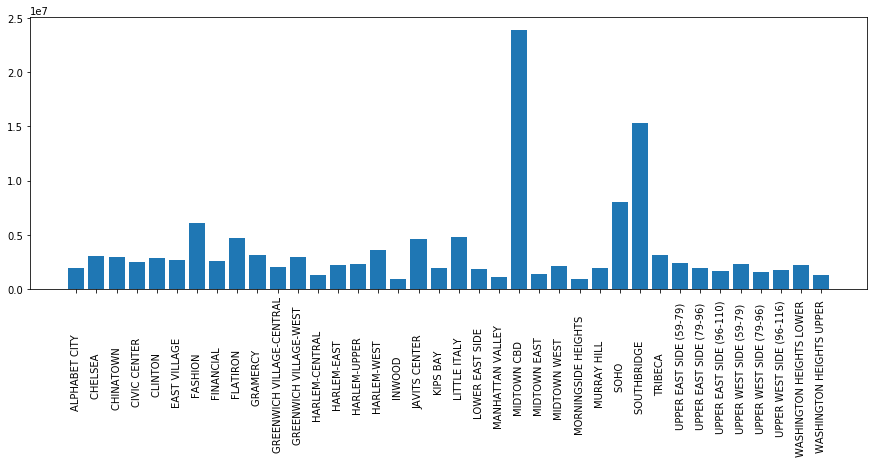

In [8]:
meanneighborhood = alldata.groupby('NEIGHBORHOOD').mean()
meanprices = meanneighborhood.SALEPRICE.dropna(axis=0)
neighborhoods = list(meanprices.index.values)

plt.figure(figsize=(15,5))
plt.bar(neighborhoods, meanprices)
plt.xticks(rotation='vertical')
plt.show()

###### Seeing how old houses are on average across neighborhoods

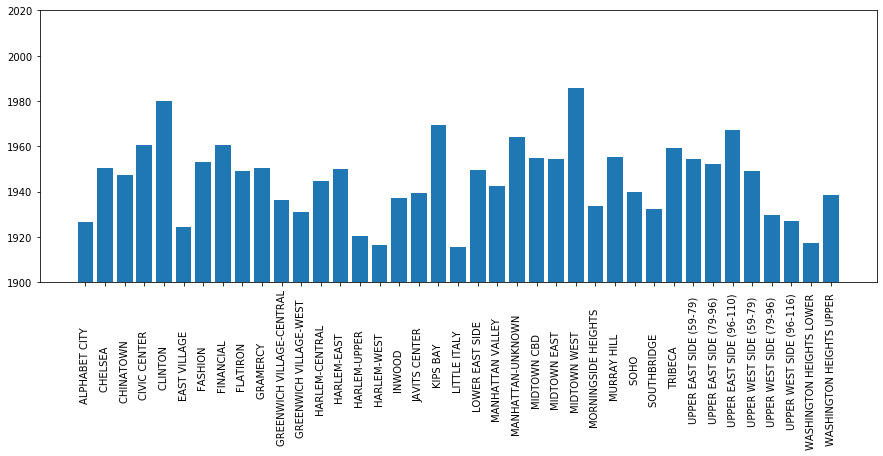

In [9]:
#Average year built across neighborhoods
meanyear = meanneighborhood['YEAR BUILT'].dropna(axis=0)
nbyear = list(meanyear.index.values)

plt.figure(figsize=(15,5))
plt.bar(nbyear, meanyear)
plt.xticks(rotation='vertical')
plt.ylim(1900, 2020)
plt.show()

###### Space per property across nieghborhoods

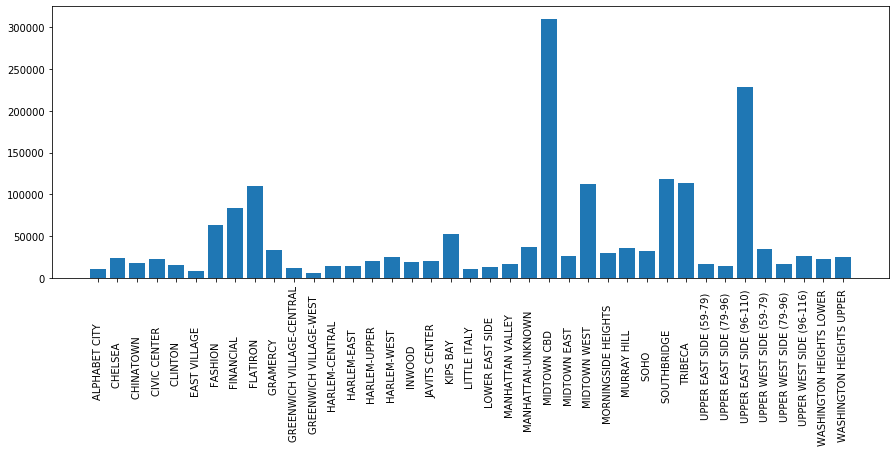

In [10]:

meanspace = meanneighborhood['GROSS SQUARE FEET'].dropna(axis=0)
nbspace = list(meanspace.index.values)

plt.figure(figsize=(15,5))
plt.bar(nbspace, meanspace)
plt.xticks(rotation='vertical')
plt.show()

###### Trends over time: Average price

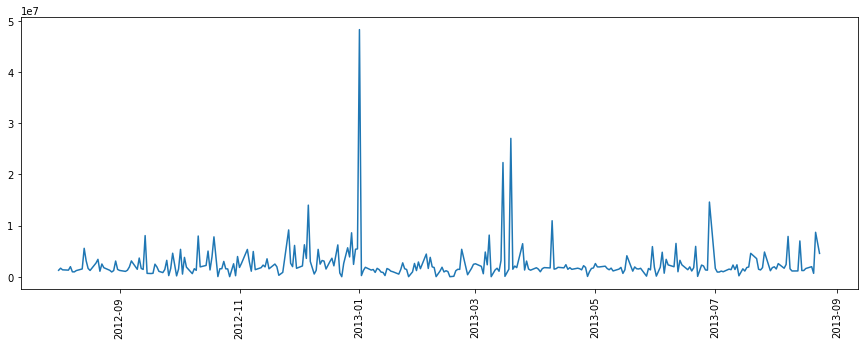

BOROUGH                                                                      1
NEIGHBORHOOD                                         GRAMERCY                 
BUILDING CLASS CATEGORY           07  RENTALS - WALKUP APARTMENTS             
TAX CLASS AT PRESENT                                                         2
BLOCK                                                                      905
LOT                                                                         42
EASE-MENT                                                                  NaN
BUILDING CLASS AT PRESENT                                                   C7
ADDRESS                              230 EAST 25TH   STREET                   
APARTMENTNUMBER                                                            NaN
ZIP CODE                                                                 10010
RESIDENTIAL UNITS                                                           35
COMMERCIAL UNITS                                    

In [11]:
datemean = alldata.groupby('SALE DATE').mean()
saledate = datemean['SALEPRICE'].dropna(axis=0)
dtlabels = list(saledate.index.values)

plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
plt.plot(dtlabels, saledate)
plt.show()


# Checking what that large peak is, it's some fancy huge appartment block in Gramercy
maximum = saledate.idxmax(axis=1)
mask = (alldata['SALE DATE'] == maximum)
intdate = alldata.loc[mask]
intdate = intdate['SALEPRICE'].dropna(axis=0)
coolsale = intdate.idxmax(axis=1)

print(alldata.loc[coolsale])

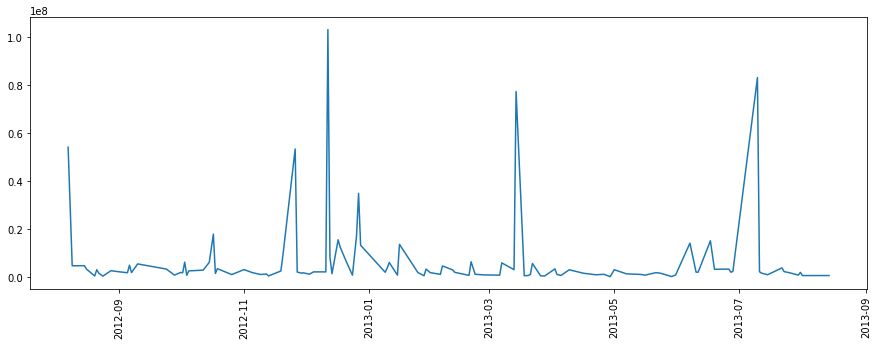

In [12]:
# Maybe mean price of one neighborhood gives better indication of seasonal fluctuations in buying behaviour
mask = (alldata['NEIGHBORHOOD']  == 'FASHION                  ')
fashion = alldata.loc[mask]
meanfashion = fashion.groupby('SALE DATE').mean()
meanfashion = meanfashion['SALEPRICE'].dropna(axis=0)
fashionlbls = list(meanfashion.index.values)

plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
plt.plot(fashionlbls, meanfashion)
plt.show()


###### Price vs. Gross square feet percentiles

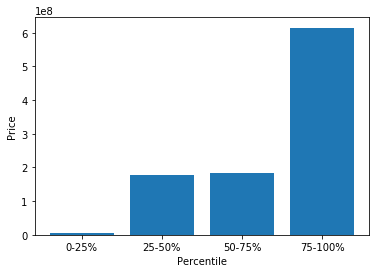

In [16]:

mxsp = max(alldata['GROSS SQUARE FEET'].dropna(axis=0))
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
bins = [-math.inf, 0.25*mxsp, 0.5*mxsp, 0.75*mxsp, mxsp]

# clean 'free' housing
indices = alldata['SALEPRICE'].dropna(axis=0).index
alldata = alldata.loc[indices]

alldata['percentiles'] = pd.cut(alldata['GROSS SQUARE FEET'], bins=bins, labels=labels)
indices = alldata['percentiles'].dropna(axis=0).index
gdata = alldata.loc[indices]

prcmean = gdata.groupby('percentiles').mean()



plt.bar(labels, prcmean['SALEPRICE'])
plt.xlabel('Percentile')
plt.ylabel('Price')
plt.show()

###### More analysis of effect build year vs. price

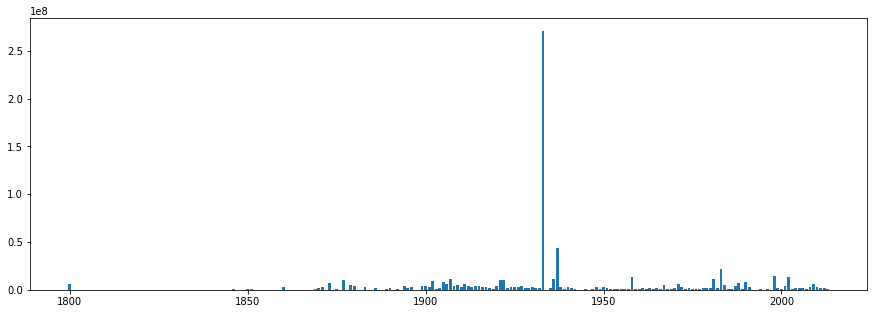

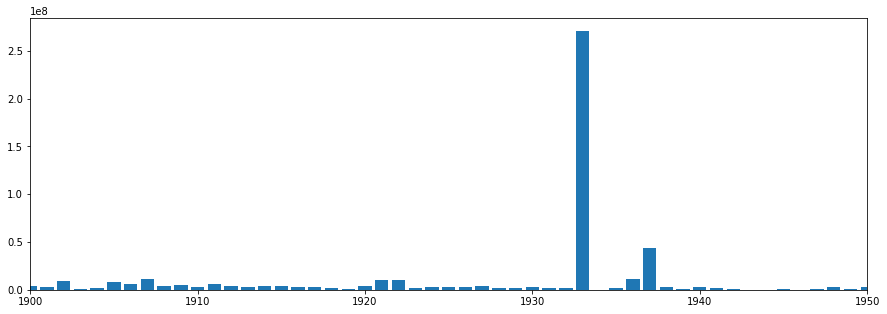

In [14]:
# Year built vs mean price

yrbuilt = alldata.groupby('YEAR BUILT').mean()

indices = yrbuilt['SALEPRICE'].dropna(axis=0).index
yrbuilt = yrbuilt.loc[indices]

years = list(indices)

plt.figure(figsize=(15,5))
plt.bar(years, yrbuilt['SALEPRICE'])
plt.show()

#let's zoom in on the years with highest prices

plt.figure(figsize=(15,5))
plt.bar(years, yrbuilt['SALEPRICE'])
plt.xlim(1900,1950)
plt.show()

###### Effect of residential unit number on price

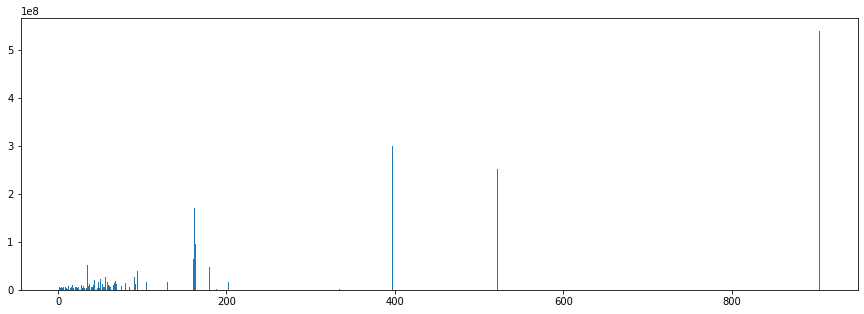

In [268]:
# Number of residential units vs mean price

residential = alldata.groupby('RESIDENTIAL UNITS').mean()
indices = residential['SALEPRICE'].dropna(axis=0).index
residential = residential.loc[indices]
units = list(indices)

plt.figure(figsize=(15,5))
plt.bar(units, residential['SALEPRICE'])
plt.show()


###### Checking number of sales over time to find trends
Here I found out that multiple listings could belong to the same building if the entire building is sold.

In [276]:
adress = alldata['ADDRESS']
usedadr = []
unqindex = []
for i in adress.index:
    if adress[i] not in usedadr:
        usedadr.append(adress[i])
        unqindex.append(i)
        
unqbuildings = alldata.loc[unqindex]

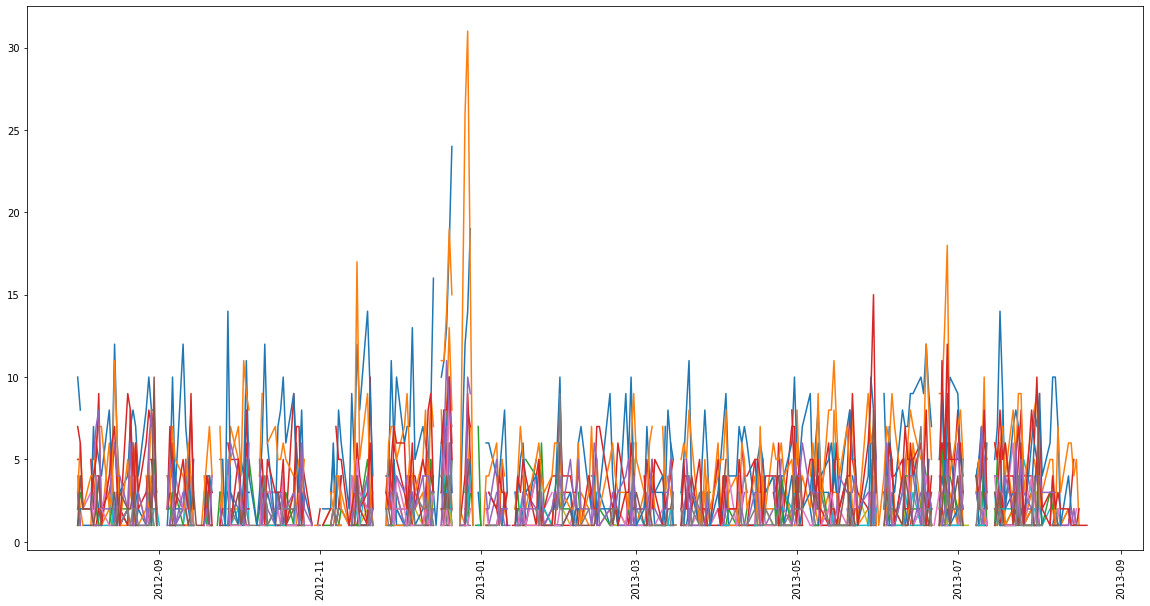

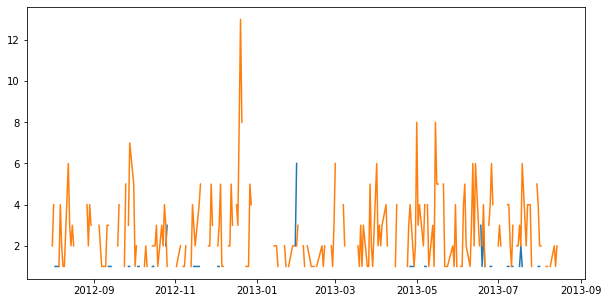

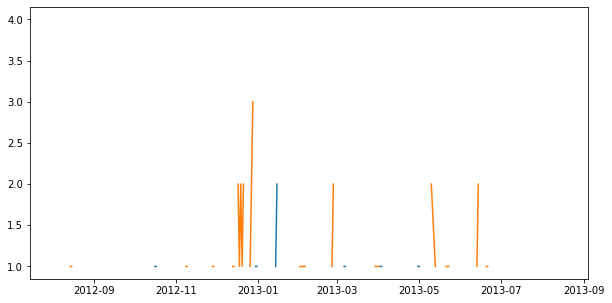

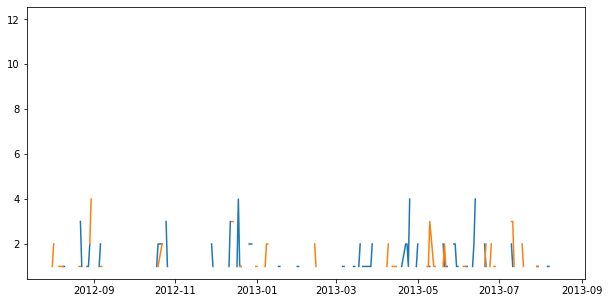

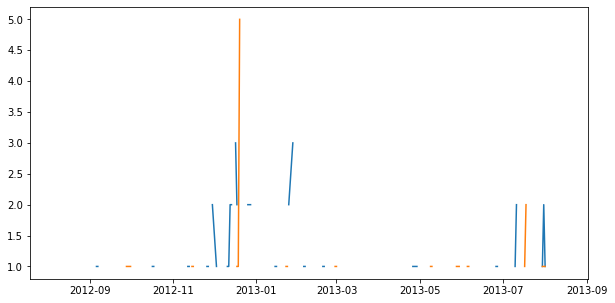

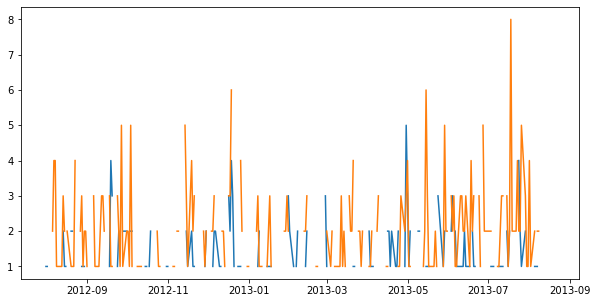

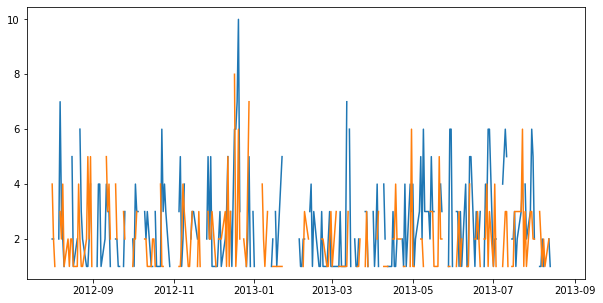

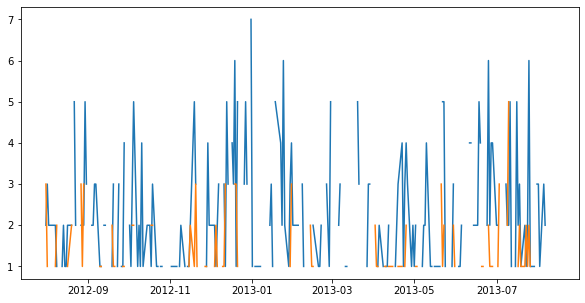

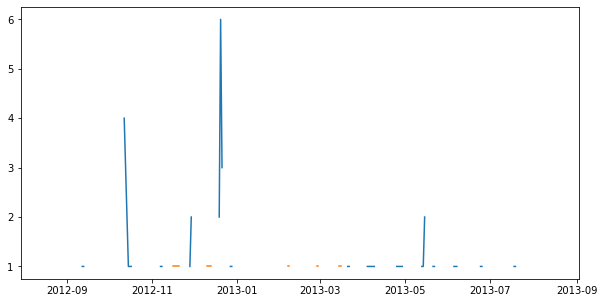

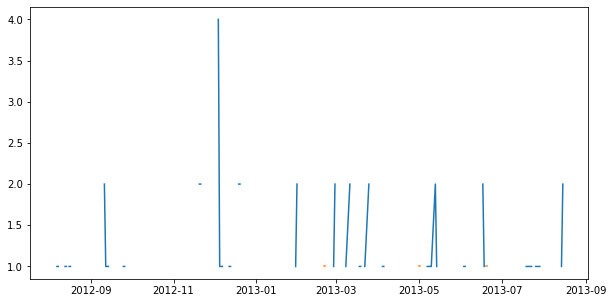

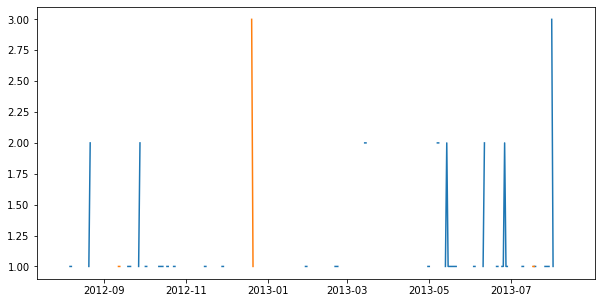

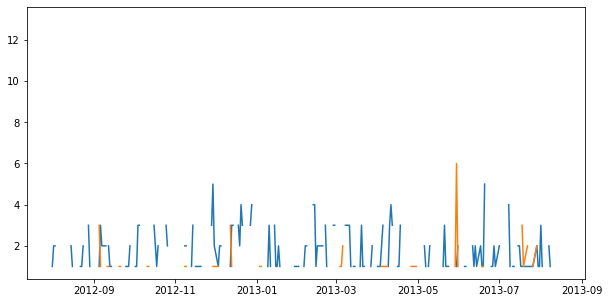

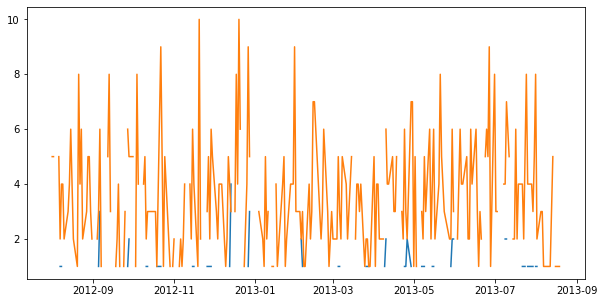

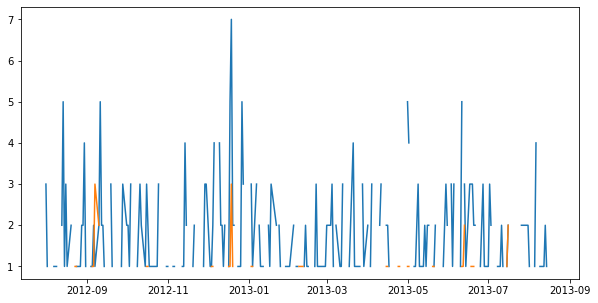

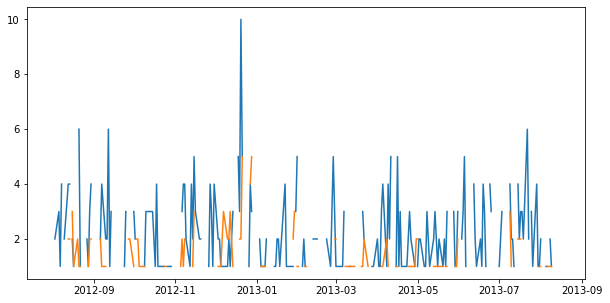

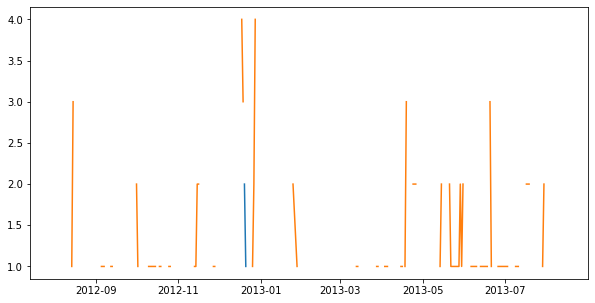

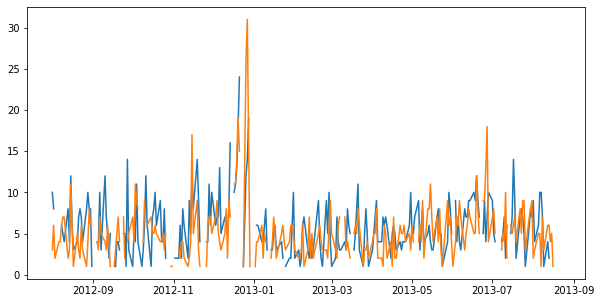

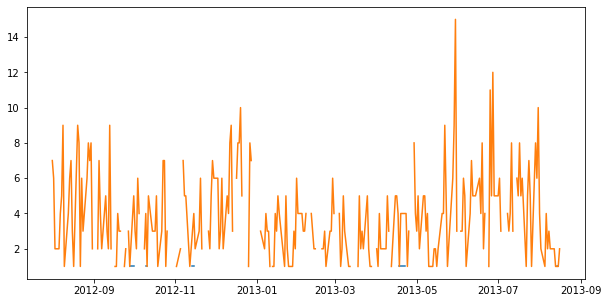

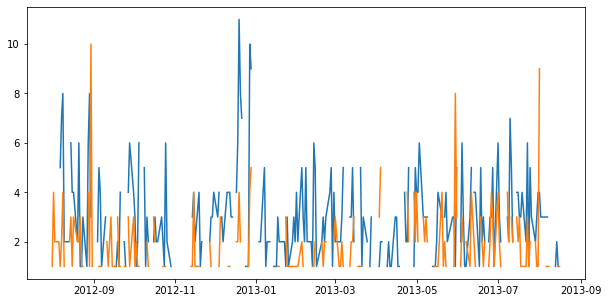

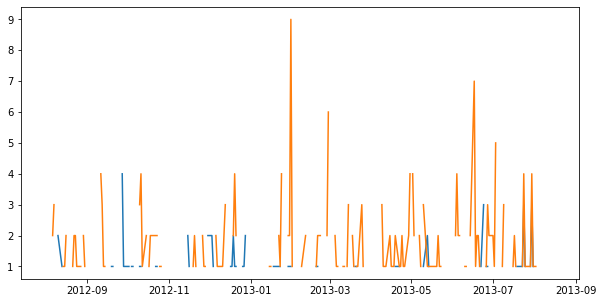

In [263]:
NB = unqbuildings.groupby(['NEIGHBORHOOD', 'SALE DATE']).size().unstack()
NB = NB.T

plt.figure(figsize=(20,10))
plt.plot(NB)
plt.xticks(rotation='vertical')
plt.show()

# too many lines makes for a mess, so divide up the info into a lot of smaller plots consisting of two lines

sublist = []
for i in range(0,19):
    sublist.append(NB.iloc[:,2*i:(2*i+2)])

for i in range(0, 19):
    plt.figure(figsize=(10,5))
    plt.plot(sublist[i])
    
plt.show()

###### Monthly mean number of sales per neighborhood
It looks like a peak can be seen for many neighborhoods in december and a smaller one in February.

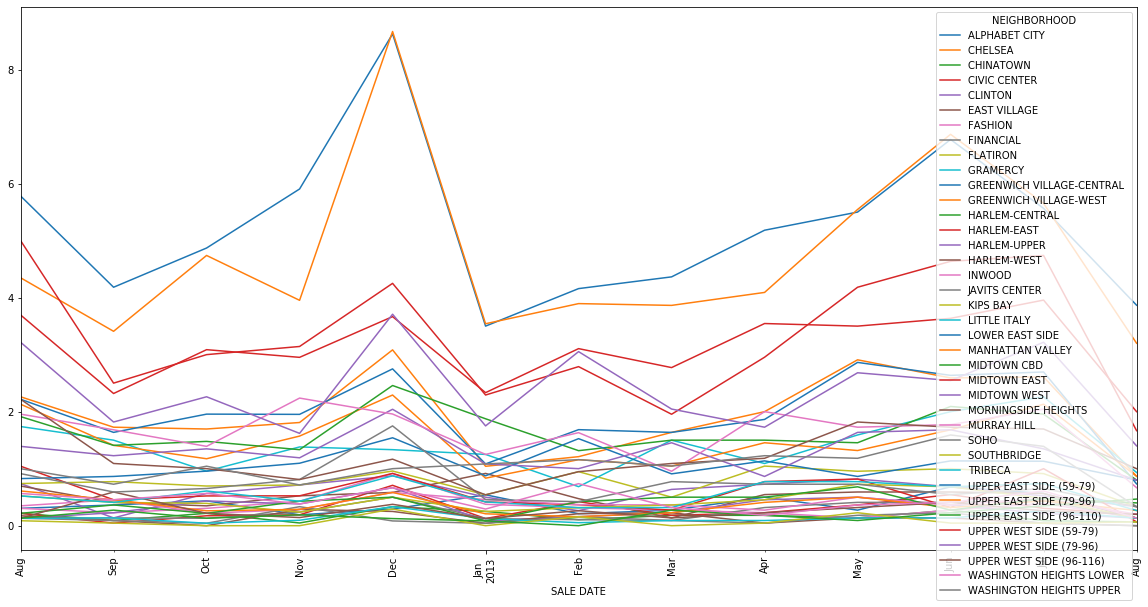

In [281]:
groupy = NB.fillna(0)
groupy = groupy.groupby(pd.Grouper(freq='M')).mean()
yvals = list(groupy.columns)


groupy.plot(y=yvals,figsize=(20,10), rot='vertical')


groupy.to_csv('groupy.csv')

In retrospect this became more of a visualization exercise than a goal oriented investigation of the data. I found it hard to determine what relationships I should visualize or explore because I have no idea what correlations between features exist in real estate, apart from the obvious ones like size vs. price f.e. Even though I probably didn't get even near the full value out of this data, I feel like it is lacking info on features like the ones I thought about in the intro. It seems hard to find relationships if you just look at dry features like these. My strategy right now, based on this info, coming into the market as on online realtor, would be to focus on the price- and size range the buyer inputs. Based on this price range you could at least narrow down to a small set of neighborhoods the buyer might be interested in. I would quickly try to expand the available data I would have to include more specific features like the ones in the intro. 